In [1]:
#from mpl_toolkits import mplot3d
import pandas as pd
from numpy import array
import numpy as np
import h5py
import mplcursors
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import pearsonr
%matplotlib inline
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,

    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "computer-modern-roman",

    "figure.dpi": 300,
    "savefig.dpi": 300,
})


CMAPS = plt.colormaps
CMAP = CMAPS['hsv']

h = 0.6774  # co-moving constant


In [2]:
g_dat = pd.read_pickle('./beta_data.pickle')

In [3]:
h5dat = h5py.File('./main_branch_orbit_data_snapshot_1200.hdf5')

# for x in dat.values():
#     try:
#         list(x)
#     except:
#         print(x)
#         raise
flydat = pd.DataFrame((list(x) for x in h5dat.values() if x.shape != ()), index=(
    k for k in h5dat.keys() if h5dat[k].shape != ())).transpose().convert_dtypes()
flydat.dtypes

d_entry                   Float64
d_innermost               Float64
dhost_final               Float64
fdrvir_innermost          Float64
fdrvirfinal_innermost     Float64
first_d_peri_all          Float64
first_d_peri_fourth       Float64
first_d_peri_half         Float64
first_d_peri_tenth        Float64
first_d_peri_twentieth    Float64
first_z_peri_all          Float64
first_z_peri_fourth       Float64
first_z_peri_half         Float64
first_z_peri_tenth        Float64
first_z_peri_twentieth    Float64
last_d_peri_all           Float64
last_d_peri_fourth        Float64
last_d_peri_half          Float64
last_d_peri_tenth         Float64
last_d_peri_twentieth     Float64
last_fdrvir_peri_all      Float64
last_mvir_peri_all        Float64
last_rvir_peri_all        Float64
last_z_peri_all           Float64
last_z_peri_fourth        Float64
last_z_peri_half          Float64
last_z_peri_tenth         Float64
last_z_peri_twentieth     Float64
mb_entry                  Float64
mb_today      

In [4]:
dat = g_dat.merge(flydat, left_index=True, right_index=True)



# remove bad data
dat = dat[dat['d_innermost'] < 20000].copy()

# M_tot calculation
dat['M_tot'] = (
    dat['stars_mass_within_r50_stars'] + 
    dat['gas_mass_within_r50_stars'] + 
    dat['dm_mass_within_r50_stars']
)

s_filt = dat['is_satellite']

In [5]:
sum(dat[s_filt]['d_innermost'] != 0)

365

In [6]:
list(dat.keys())

['Mgas_ahf_cat',
 'Mstar_ahf_cat',
 'Mvir_ahf_cat',
 'Redge',
 'Redge_ahf',
 'Rvir',
 'Rvir_ahf',
 'Rvir_ahf_cat',
 'Xc_ahf_cat',
 'Yc_ahf_cat',
 'Zc_ahf_cat',
 'dm_mass_within_r30_dm',
 'dm_mass_within_r30_dm_ahf',
 'dm_mass_within_r30_gas',
 'dm_mass_within_r30_gas_ahf',
 'dm_mass_within_r30_stars',
 'dm_mass_within_r30_stars_ahf',
 'dm_mass_within_r50_dm',
 'dm_mass_within_r50_dm_ahf',
 'dm_mass_within_r50_gas',
 'dm_mass_within_r50_gas_ahf',
 'dm_mass_within_r50_stars',
 'dm_mass_within_r50_stars_ahf',
 'dm_mass_within_r80_dm',
 'dm_mass_within_r80_dm_ahf',
 'dm_mass_within_r80_gas',
 'dm_mass_within_r80_gas_ahf',
 'dm_mass_within_r80_stars',
 'dm_mass_within_r80_stars_ahf',
 'galaxyID',
 'gas_mass_within_r30_dm',
 'gas_mass_within_r30_dm_ahf',
 'gas_mass_within_r30_gas',
 'gas_mass_within_r30_gas_ahf',
 'gas_mass_within_r30_stars',
 'gas_mass_within_r30_stars_ahf',
 'gas_mass_within_r50_dm',
 'gas_mass_within_r50_dm_ahf',
 'gas_mass_within_r50_gas',
 'gas_mass_within_r50_gas_ahf',

In [7]:
np.mean(dat[s_filt]['d_innermost'])

109.43703391512449

Text(0, 0.5, '$\\beta$')

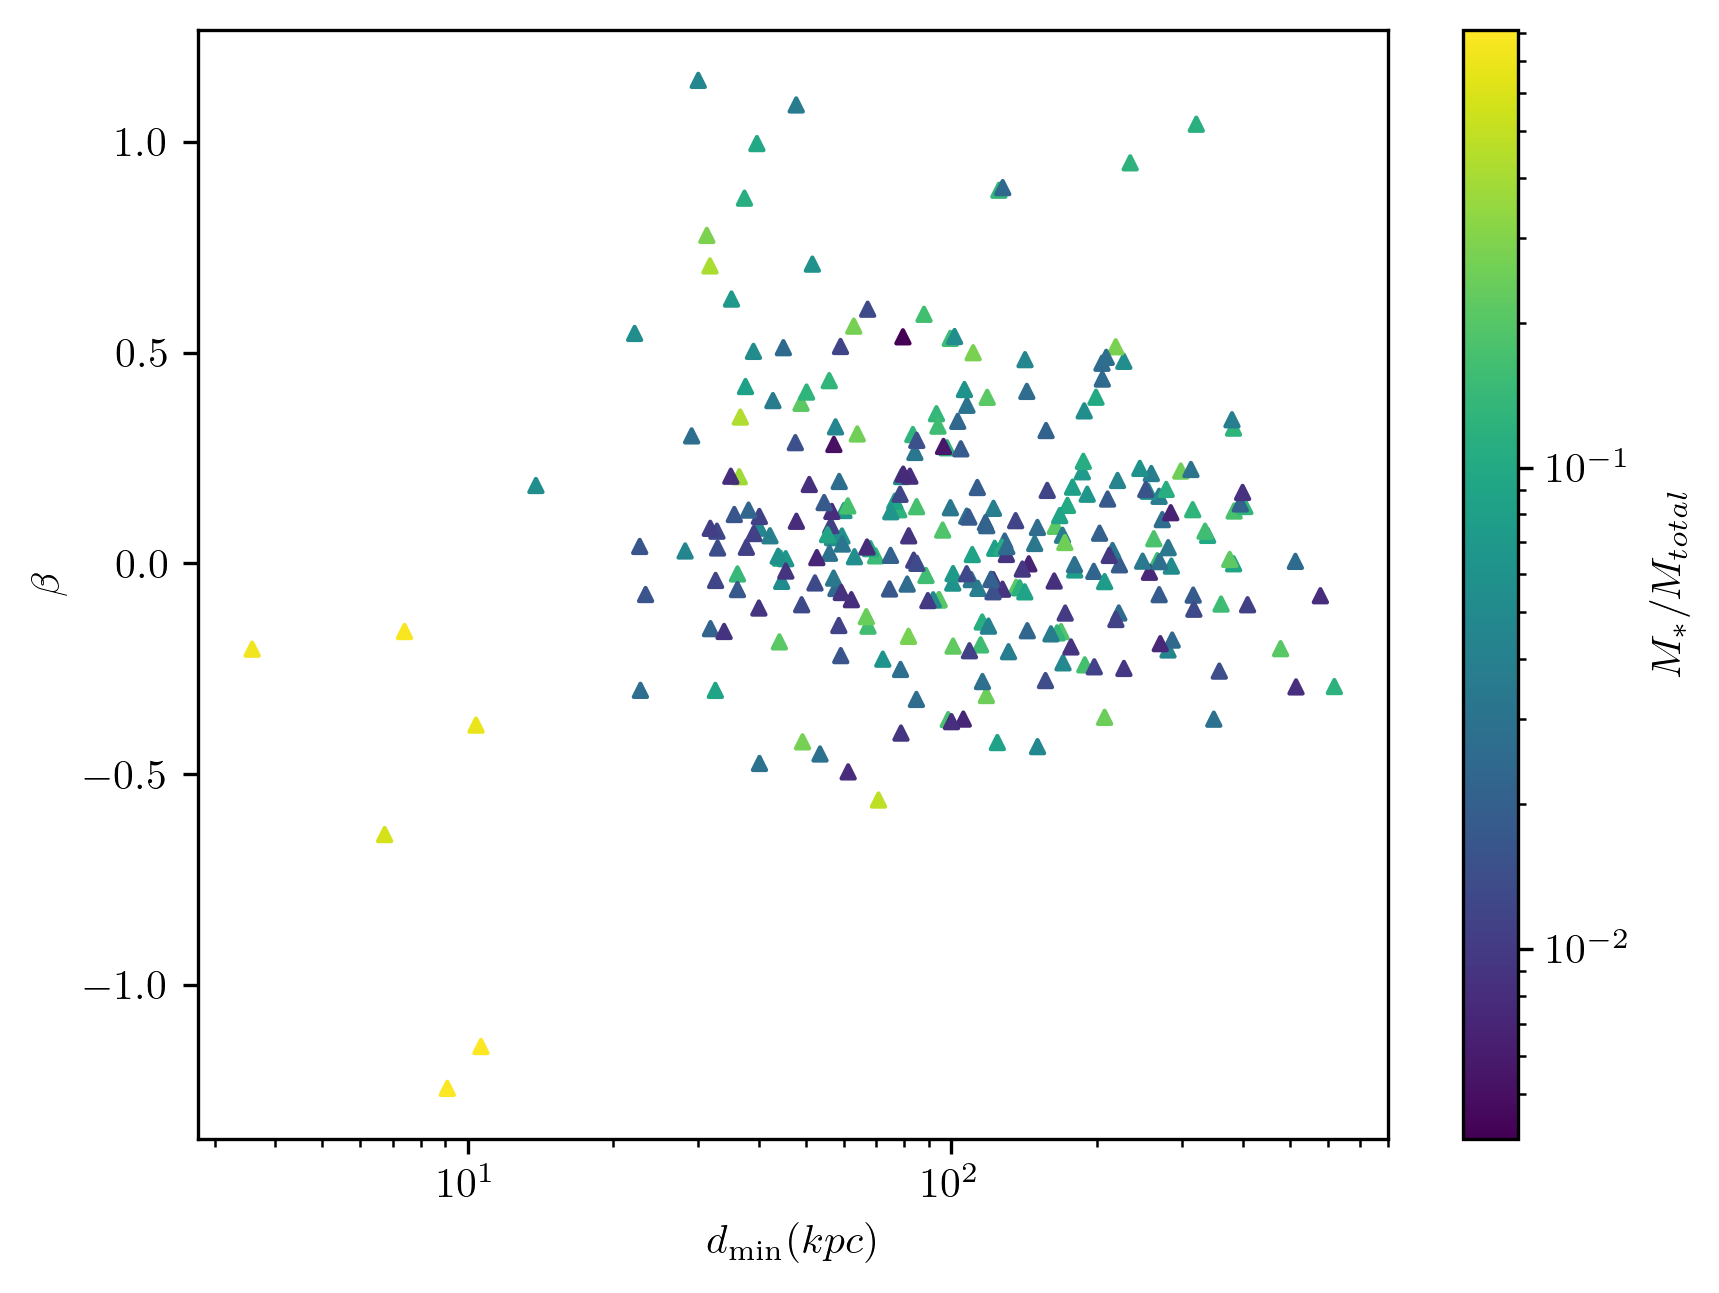

In [8]:



fig, ax = plt.subplots()

ax.set_xscale('log')


filt = dat['is_satellite'] & (dat['d_innermost'] != 0) & (dat['stars_mass_within_r50_stars'] <= 1e9)

c = dat[filt]['stars_mass_within_r50_stars'] / dat[filt]['M_tot']

_scatter = ax.scatter(
    dat[filt]['d_innermost'],
    dat[filt]['beta_r50'],
    s=10,
    marker='^',
    c=c,
    # log scale for colors
    norm=mpl.colors.LogNorm(np.min(c), np.max(c))
)

cbar = fig.colorbar(_scatter, ax=ax)
cbar.set_label(r'$M_*/M_{total}$')

ax.set_xlabel(r'$d_{\rm{min}} (kpc)$')
ax.set_ylabel(r'$\beta$')


In [9]:
dat.loc[dat['galaxyID'] == 2, 'rvir_innermost']

2    608.576912
Name: rvir_innermost, dtype: Float64

In [10]:
flydat[flydat['d_innermost'] != 0]

,d_entry,d_innermost,dhost_final,fdrvir_innermost,fdrvirfinal_innermost,first_d_peri_all,first_d_peri_fourth,first_d_peri_half,first_d_peri_tenth,first_d_peri_twentieth,...,mt_today,mvir_innermost,n_peri_all,n_peri_fourth,n_peri_half,n_peri_tenth,n_peri_twentieth,rvir_innermost,z_entry,z_innermost
18,584.319501,35.01263,152.156039,0.051829,0.051112,35.01263,35.01263,35.01263,35.01263,35.01263,...,1633436669619.13208,17466046648951.875,1,1,1,1,0,675.540005,0.10369,0.01783
23,0.0,495.930291,495.930291,1.169352,1.169352,-1.0,-1.0,-1.0,-1.0,-1.0,...,965494537939.179321,4190035429583.702637,-1,-1,-1,-1,-1,424.106879,0.0,0.0
26,0.0,21852.470291,21852.470291,35.907492,35.907492,-1.0,-1.0,-1.0,-1.0,-1.0,...,723017419545.320435,12380897549453.794922,-1,-1,-1,-1,-1,608.576912,0.0,0.0
31,480.616515,22.092368,60.254281,0.035311,0.03521,78.696056,78.696056,78.696056,78.696056,78.696056,...,452624741659.285522,13641378801299.085938,2,2,2,1,1,625.652128,0.26869,0.00803
65,260.035054,22.316395,28.297814,0.047566,0.047502,161.66314,161.66314,161.66314,161.66314,161.66314,...,187552406259.226471,5720283436669.619141,3,2,2,1,1,469.168129,0.49881,0.0048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,248.416726,106.422923,332.842741,0.23424,0.169614,171.634189,171.634189,171.634189,171.634189,171.634189,...,517404782.9938,9005594921759.669922,3,2,2,0,0,454.333198,1.12838,0.3277
1703,463.479263,113.144332,623.741232,0.213709,0.16517,113.144332,113.144332,113.144332,113.144332,113.144332,...,518060230.292294,11083451431945.675781,1,1,1,0,0,529.431075,0.32211,0.17824
1707,137.422965,54.580818,165.324187,0.364367,0.158499,54.580818,54.580818,54.580818,54.580818,54.580818,...,476768526.719811,1127785651018.600586,2,1,2,0,0,149.79628,1.44186,1.1875
1717,337.136432,130.171469,226.567167,0.24361,0.213895,130.171469,130.171469,130.171469,130.171469,130.171469,...,218135518.157662,13510466489518.748047,2,1,2,0,0,534.344005,0.64829,0.27902


In [11]:
list(flydat.columns)

['d_entry',
 'd_innermost',
 'dhost_final',
 'fdrvir_innermost',
 'fdrvirfinal_innermost',
 'first_d_peri_all',
 'first_d_peri_fourth',
 'first_d_peri_half',
 'first_d_peri_tenth',
 'first_d_peri_twentieth',
 'first_z_peri_all',
 'first_z_peri_fourth',
 'first_z_peri_half',
 'first_z_peri_tenth',
 'first_z_peri_twentieth',
 'last_d_peri_all',
 'last_d_peri_fourth',
 'last_d_peri_half',
 'last_d_peri_tenth',
 'last_d_peri_twentieth',
 'last_fdrvir_peri_all',
 'last_mvir_peri_all',
 'last_rvir_peri_all',
 'last_z_peri_all',
 'last_z_peri_fourth',
 'last_z_peri_half',
 'last_z_peri_tenth',
 'last_z_peri_twentieth',
 'mb_entry',
 'mb_today',
 'mdm_entry',
 'mdm_today',
 'mg_entry',
 'mg_today',
 'ms_entry',
 'ms_today',
 'mt_entry',
 'mt_today',
 'mvir_innermost',
 'n_peri_all',
 'n_peri_fourth',
 'n_peri_half',
 'n_peri_tenth',
 'n_peri_twentieth',
 'rvir_innermost',
 'z_entry',
 'z_innermost']

In [12]:
dat[dat['d_innermost'] == 0]

,Mgas_ahf_cat,Mstar_ahf_cat,Mvir_ahf_cat,Redge,Redge_ahf,Rvir,Rvir_ahf,Rvir_ahf_cat,Xc_ahf_cat,Yc_ahf_cat,...,mt_today,mvir_innermost,n_peri_all,n_peri_fourth,n_peri_half,n_peri_tenth,n_peri_twentieth,rvir_innermost,z_entry,z_innermost
0,9.512860e+11,6.012280e+11,1.196040e+13,29.338589,29.338589,464.03,464.03,464.03,14711.058140,12986.948490,...,17656333038086.804688,17656333038086.804688,1,1,1,1,1,685.016239,15.0,0.0
1,8.225730e+11,5.471810e+11,9.190950e+12,44.675458,44.675458,425.03,425.03,425.03,7908.847332,11816.418171,...,13567980513728.964844,13567980513728.964844,1,1,1,1,1,627.443165,14.2308,0.0
2,5.407820e+11,6.436700e+11,8.386820e+12,126.069141,126.069141,412.25,412.25,412.25,14807.960987,14623.553753,...,12380897549453.794922,12380897549453.794922,1,1,1,1,1,608.576912,15.0,0.0
3,2.871070e+11,4.191250e+11,4.844970e+12,504.881648,504.881662,343.34,343.34,343.34,873.863697,14724.276066,...,7152302922940.65625,7152302922940.65625,1,1,1,1,1,506.84972,15.0,0.0
4,2.366870e+11,2.783600e+11,4.160950e+12,43.142288,43.142288,326.36,326.36,326.36,10670.664310,14930.469990,...,6142530262769.413086,6142530262769.413086,1,1,1,1,1,481.783289,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,0.000000e+00,1.019240e+07,1.686810e+08,16.993622,16.896110,12.02,12.02,12.02,3254.241943,13436.737061,...,249012400.354296,6557912607026.868164,1,0,1,0,0,490.115158,15.0,0.00803
1714,0.000000e+00,7.251800e+06,1.852670e+08,16.574539,16.309803,11.83,11.83,11.83,5317.611694,14981.918335,...,273497195.157957,440904930617.065247,1,0,0,0,0,198.5451,12.8947,0.01454
1715,0.000000e+00,1.045510e+07,1.541840e+08,14.521914,14.521914,10.88,10.88,10.88,14459.381104,12862.701416,...,227611455.565397,17654561558901.683594,1,1,1,1,1,684.856134,15.0,0.00032
1716,0.000000e+00,6.139160e+06,1.737100e+08,8.795622,8.731912,6.77,6.77,6.77,14706.802368,13045.578003,...,256436374.372601,17642899320932.980469,1,0,1,0,0,684.332204,15.0,0.00128


(PearsonRResult(statistic=0.039272818148932506, pvalue=0.5197231746959967),
 PearsonRResult(statistic=-0.06968205219547995, pvalue=0.2529559329111554))

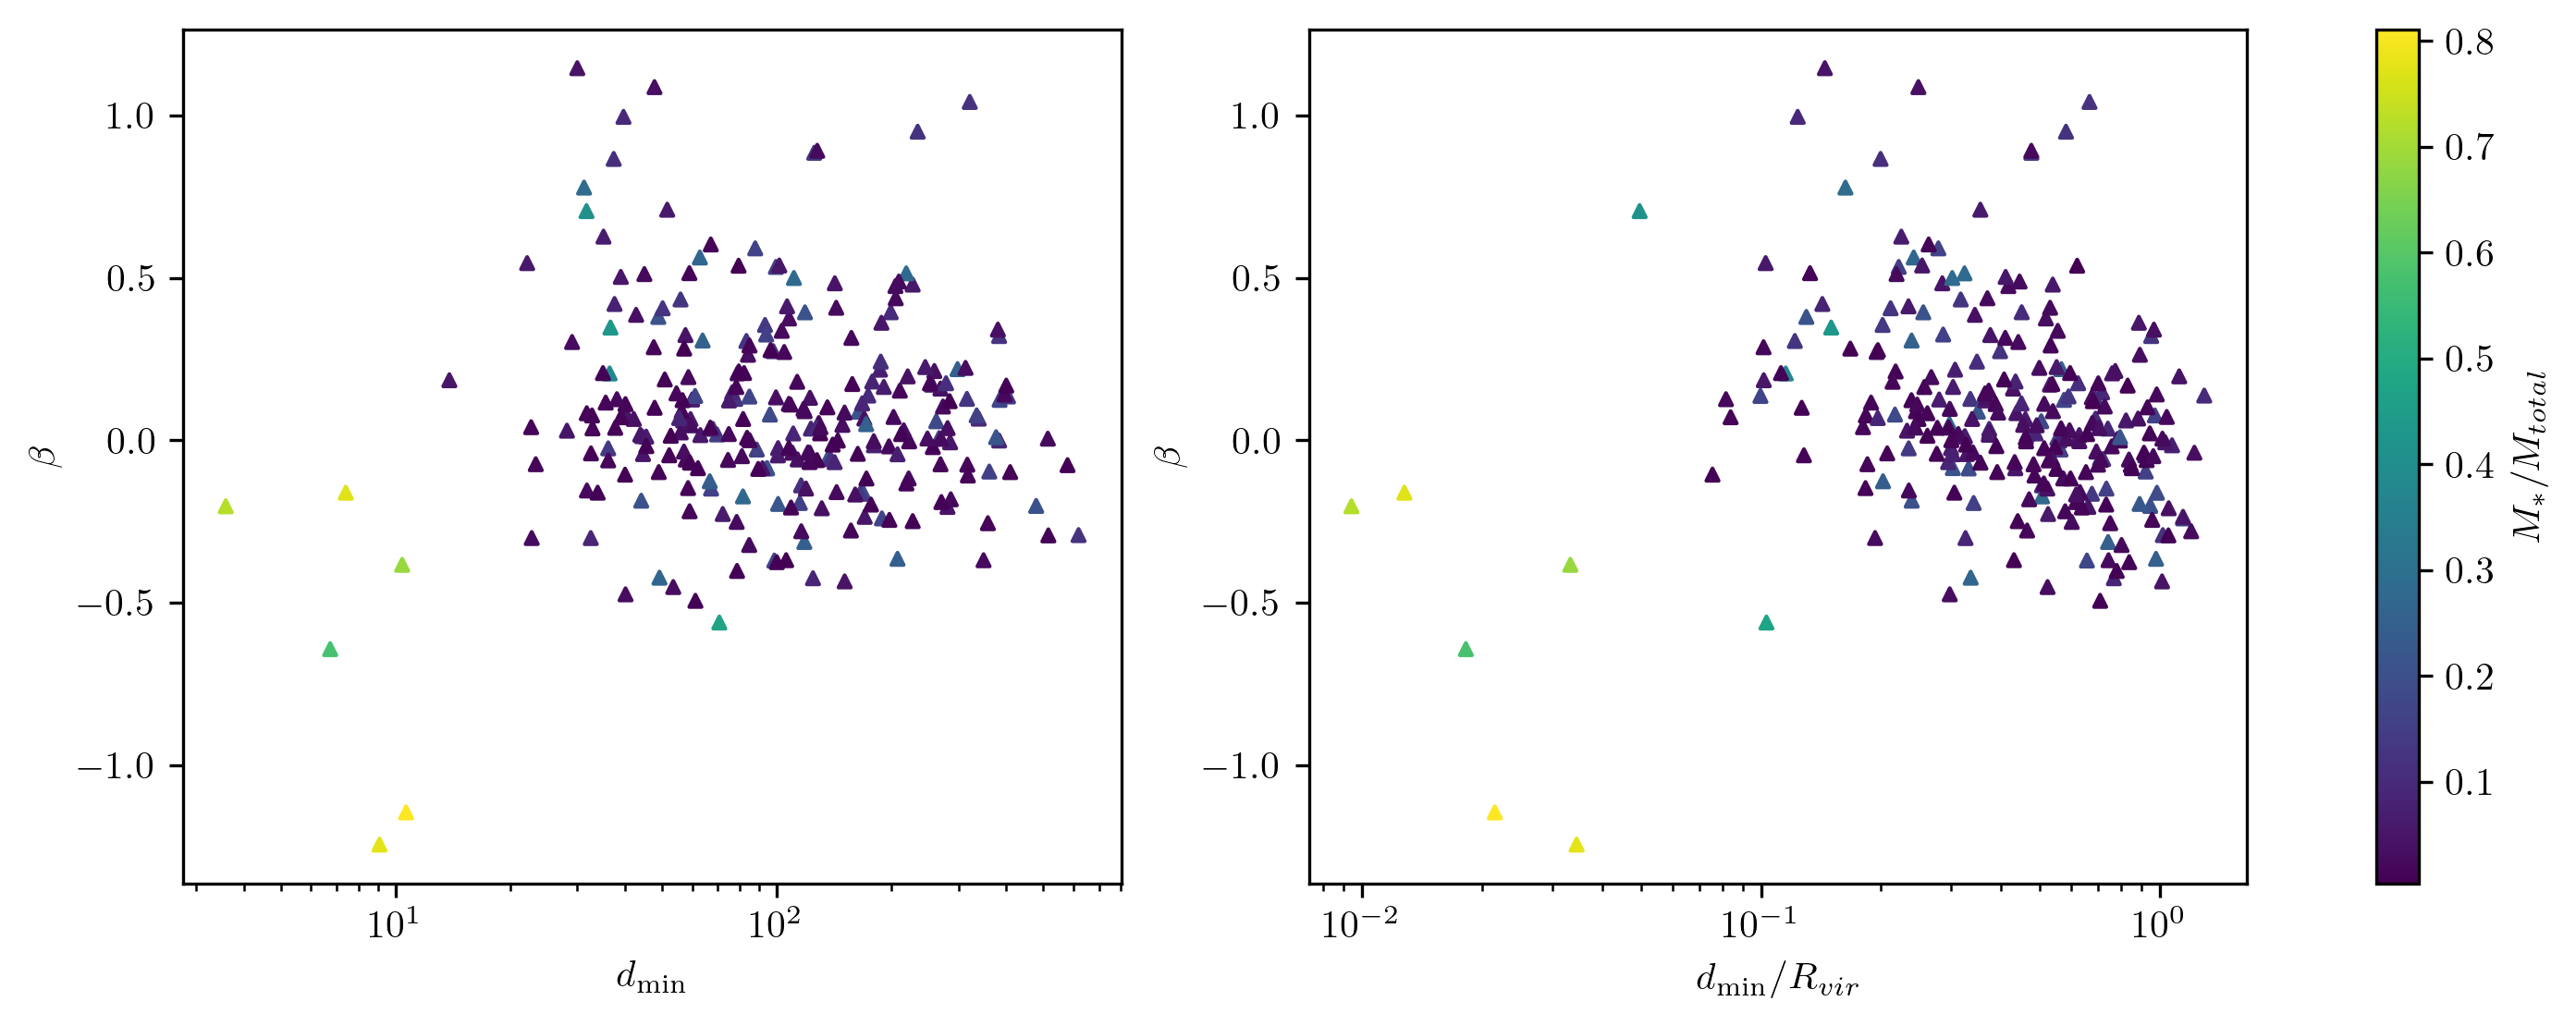

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figwidth(12)
fig.set_figheight(4)

ax1.set_xscale('log')
ax2.set_xscale('log')


filt = dat['is_satellite'] & (dat['d_innermost'] != 0) & (dat['stars_mass_within_r50_stars'] <= 1e9)

c = dat[filt]['stars_mass_within_r50_stars'] / dat[filt]['M_tot']
# c = dat[filt]['n_peri_all']

ax1.scatter(
    dat[filt]['d_innermost'],
    dat[filt]['beta_r50'],
    s=10,
    marker='^',
    c=c,
    # log scale for colors
    # norm=mpl.colors.LogNorm(np.min(c), np.max(c))
)

ax1.set_xlabel(r'$d_{\rm{min}}$')
ax1.set_ylabel(r'$\beta$')

_scatter = ax2.scatter(
    dat[filt]['d_innermost'] / dat[filt]['rvir_innermost'],
    dat[filt]['beta_r50'],
    s=10,
    marker='^',
    c=c,
    # log scale for colors
    # norm=mpl.colors.LogNorm(np.min(c), np.max(c))
)

cbar = fig.colorbar(_scatter, ax=[ax1, ax2])
cbar.set_label(r'$M_*/M_{total}$')

ax2.set_xlabel(r'$d_{\rm{min}}/R_{vir}$')
ax2.set_ylabel(r'$\beta$')

fig.savefig('paper/figs/me/beta-dmin.pdf')
fig.savefig('ppt/beta-dmin.svg')

(
    pearsonr(
        np.log(dat[filt]['d_innermost']),
        dat[filt]['beta_r50']
    ),
    pearsonr(
        np.log(dat[filt]['d_innermost'] / dat[filt]['rvir_innermost']),
        dat[filt]['beta_r50']
    )
)

In [14]:
d_filt = filt & (dat['d_innermost'] / dat['rvir_innermost'] > 0.2)

d = dat

m, b = np.polyfit(
    np.log(d[d_filt]['d_innermost'] / d[d_filt]['rvir_innermost']).to_numpy(dtype='float64'),
    d[d_filt]['beta_r50'].to_numpy(dtype='float64'),
    deg=1,
)

(PearsonRResult(statistic=-0.03300316243020934, pvalue=0.6162313276588456),
 PearsonRResult(statistic=-0.32191121426661395, pvalue=5.123116936640364e-07),
 'm=-0.18330684828000135',
 'b=-0.0657330729377733',
 'e**b=0.93638077630574',
 'e**b * a=0.38182722429235405')

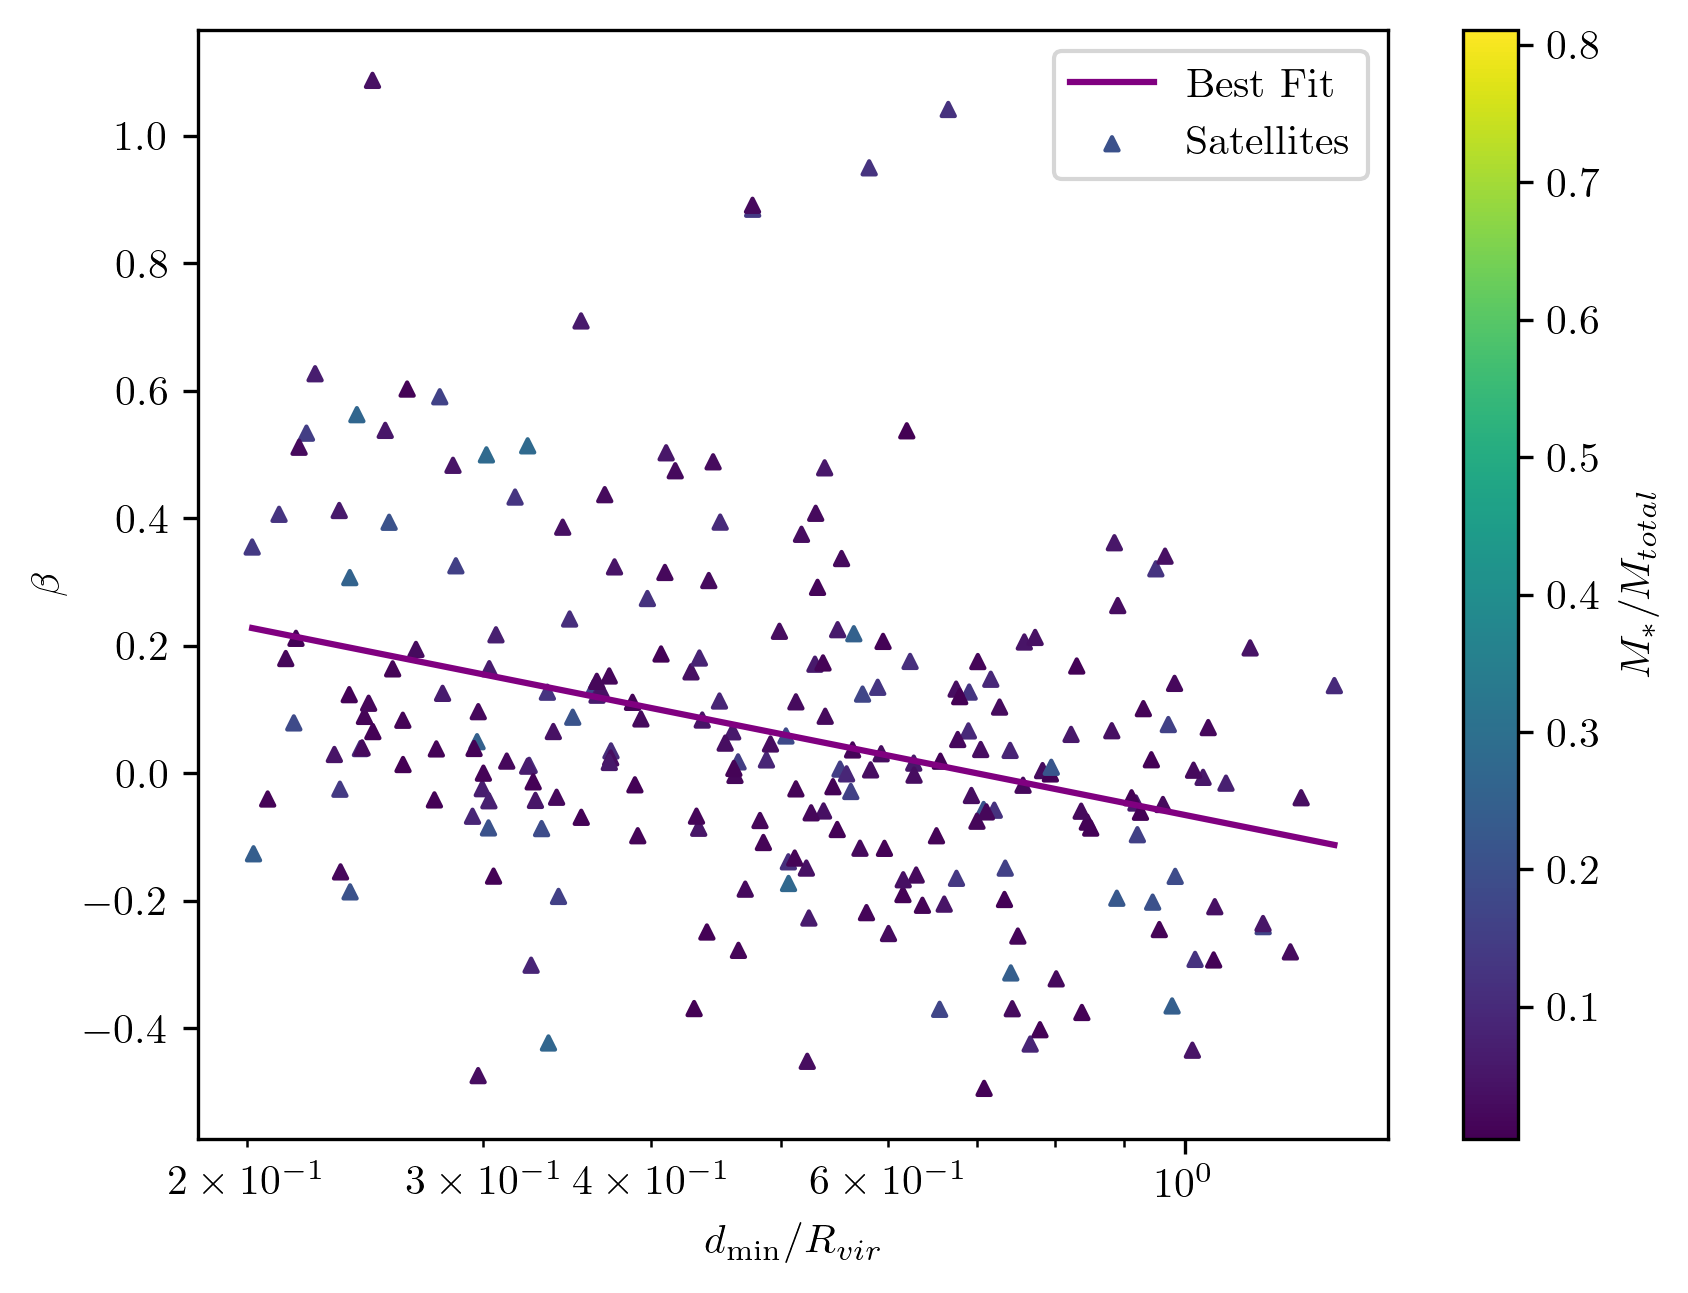

In [15]:
fig, ax = plt.subplots()

ax.set_xscale('log')

_x = np.log(dat[d_filt]['d_innermost'] / dat[d_filt]['rvir_innermost'])

ax.plot(
    *zip(
        *sorted(
            zip(
                    np.exp(_x),
                    m*_x + b,
            )
        )
    ),
    c='purple'
)

_scatter = ax.scatter(
    dat[d_filt]['d_innermost'] / dat[d_filt]['rvir_innermost'],
    dat[d_filt]['beta_r50'],
    s=10,
    marker='^',
    c=c[d_filt],
    # log scale for colors
    norm=mpl.colors.Normalize(np.min(c), np.max(c))
)

cbar = fig.colorbar(_scatter)
cbar.set_label(r'$M_*/M_{total}$')

ax.set_xlabel(r'$d_{\rm{min}}/R_{vir}$')
ax.set_ylabel(r'$\beta$')

ax.legend(('Best Fit', 'Satellites'))

fig.savefig('paper/figs/me/beta-dmin-fit.pdf')
fig.savefig('ppt/beta-dmin-fit.svg')

(
    pearsonr(
        np.log(dat[d_filt]['d_innermost']),
        dat[d_filt]['beta_r50']
    ),
    pearsonr(
        np.log(dat[d_filt]['d_innermost'] / dat[d_filt]['rvir_innermost']),
        dat[d_filt]['beta_r50']
    ),
    f'm={m}', f'b={b}', f'e**b={np.exp(b)}', f'e**b * a={np.exp(b) * 0.4077691831722127}'
)

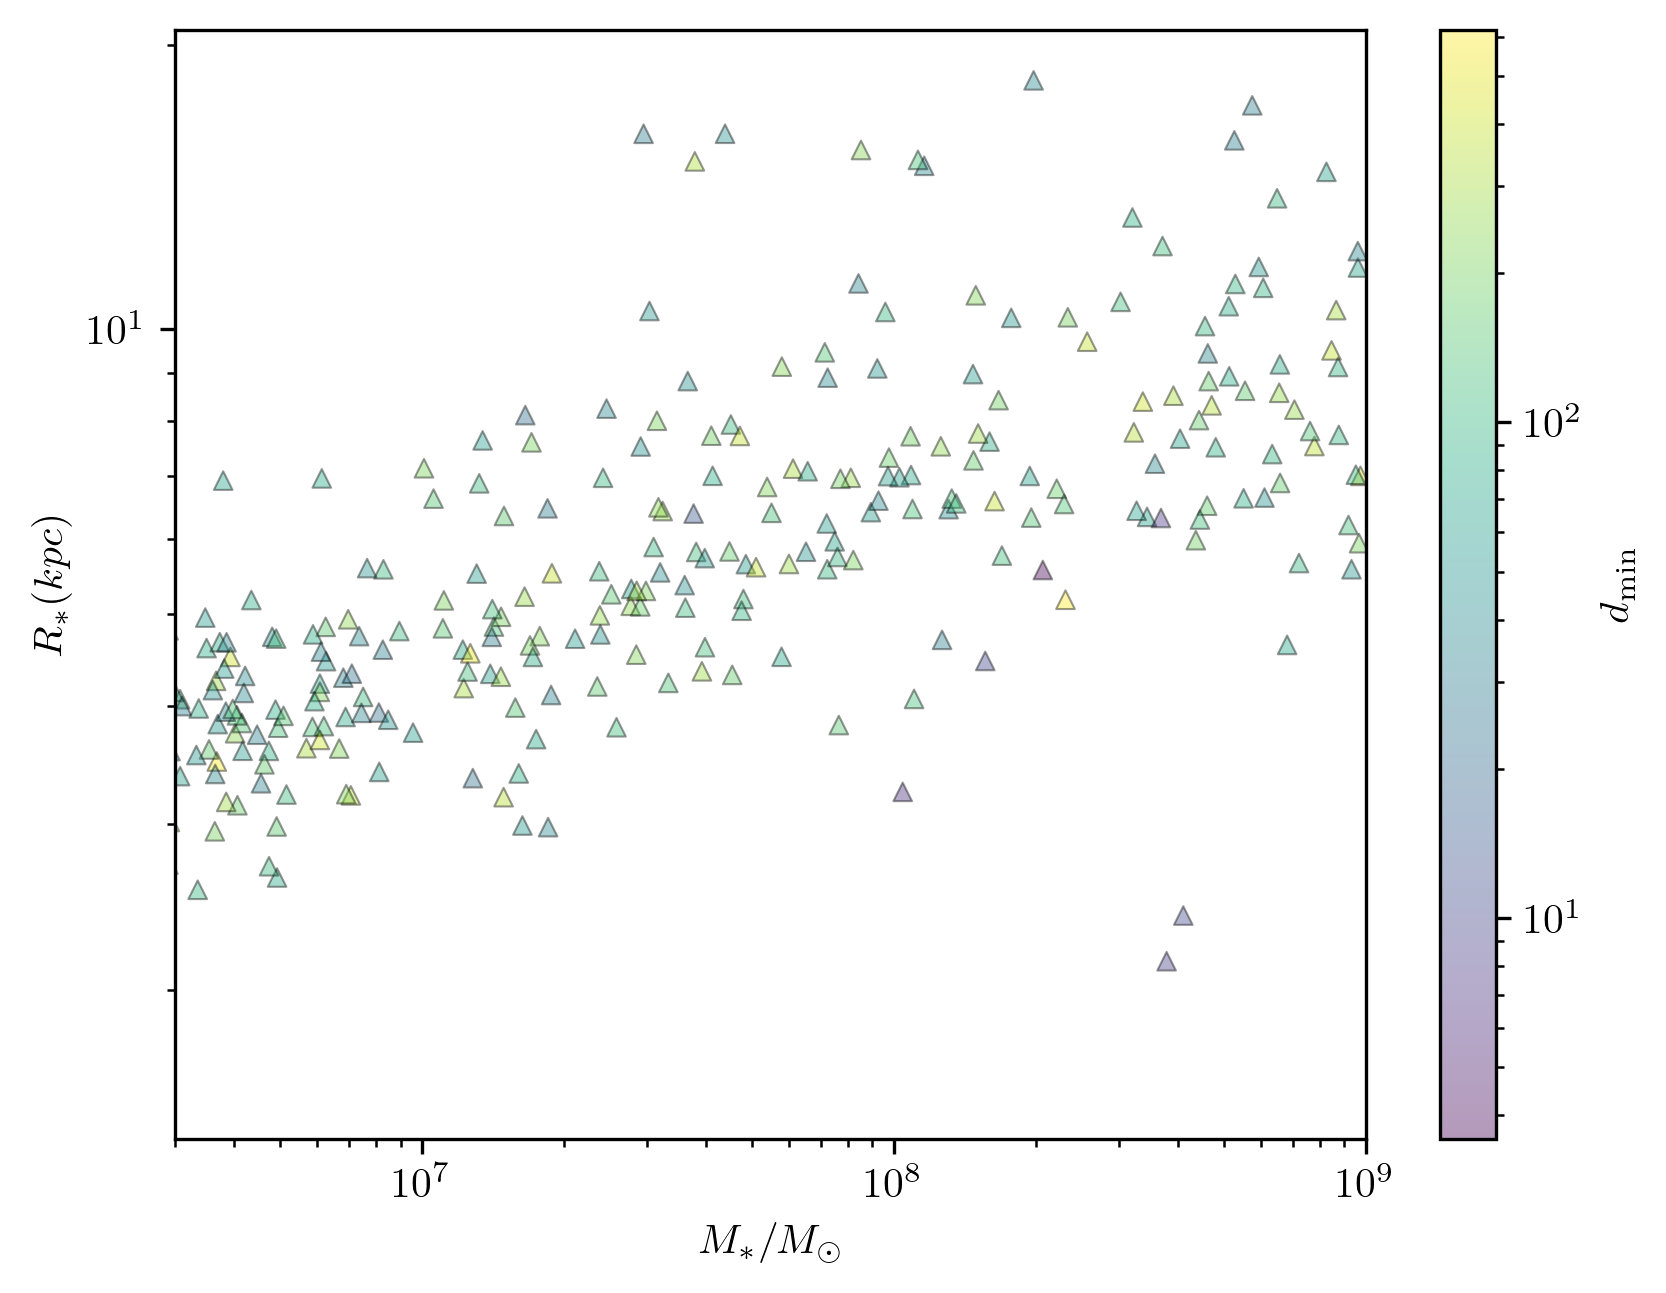

In [16]:

fig = plt.figure()
ax = plt.axes()

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(3e6, 1e9)

ax.set_xlabel(r'$M_{*} / M_\odot$')
ax.set_ylabel(r'$R_{*} (kpc)$')
d = dat
x, y = d[filt]['stars_mass_within_r50_stars_ahf'], d[filt]['r50_stars_ahf'] / h

c=d[filt]['d_innermost']

_m = ax.scatter(x, y, alpha=0.4, s=20, marker='^',
                edgecolor='black', linewidth=0.5,
                c=c,
                norm=mpl.colors.LogNorm(np.min(c), np.max(c))
                )
fig.colorbar(_m, ax=ax).set_label(r'$d_{\rm{min}}$')

NameError: name 'mask' is not defined

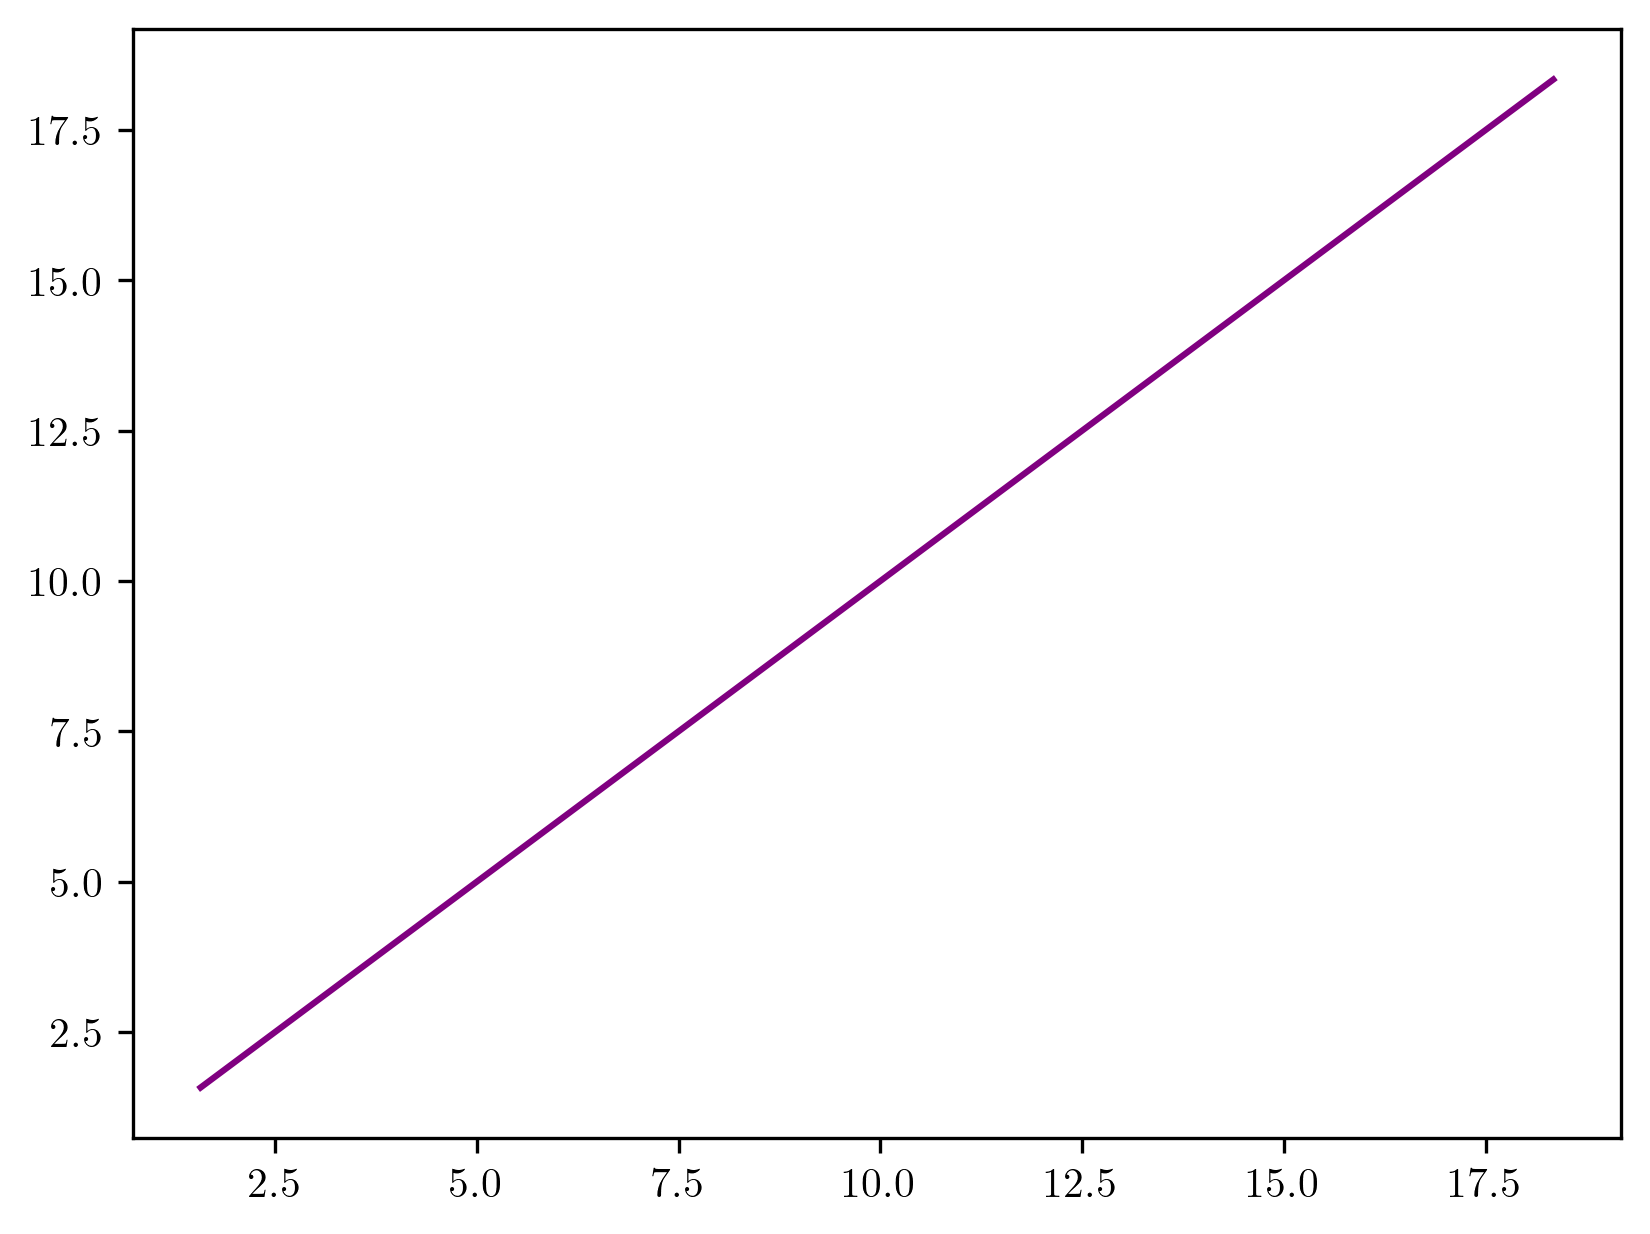

In [17]:
fig, ax = plt.subplots()

datm = dat[filt].copy()

x = (
    0.38182722429235405
    * datm['stars_mass_within_r50_stars_ahf']**0.15
    * (datm['d_innermost'] / datm['rvir_innermost'])**-0.18
)

y = datm['r50_stars_ahf'] / h

ax.plot(y.sort_values(), y.sort_values(), color='purple')

_scatter = ax.scatter(x, y, alpha=0.4, s=20, marker='^',
                edgecolor='black', linewidth=0.5,
                c=c[mask],
                norm=mpl.colors.Normalize(c.min(), c.max())
)

fig.colorbar(_scatter).set_label(r'$M_{*}/M_{\rm{tot}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xbound((3, 20))
